# Data Loading

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

sns.set_theme(style="darkgrid")


In [4]:
# airports = pd.read_csv('./data/airports.csv', sep=',')
# airlines = pd.read_csv('./data/airlines.csv')

# data to test and train on
flights_test = pd.read_csv('./flights_test.csv')
flights_train = pd.read_csv('./flights_train.csv')

print(len(flights_test))
print(len(flights_train))

# format on how to submit you results
# submit_sample = pd.read_csv('./data/submit_sample.csv')

514384
2818553


In [ ]:
unique_origin_airports = flights_train['ORIGIN_AIRPORT'].drop_duplicates()
unique_destination_airports = flights_train['DESTINATION_AIRPORT'].drop_duplicates()

connections = flights_train[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
unique_connections = connections.drop_duplicates()

# Exploratory Data Analysis

## Visualisation of flight delay on different days of the week from Januray to June

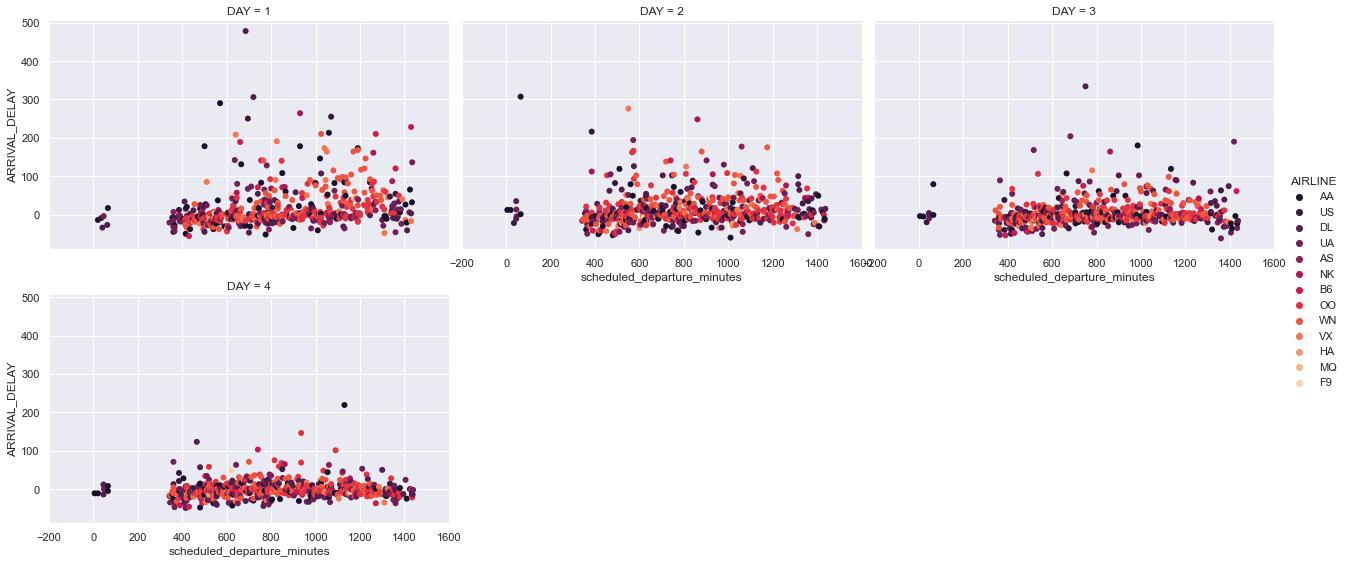

In [ ]:
# 7 -> SUNDAY

startOfDay = datetime.datetime(2015,3,1,0,0)
endOfDay = startOfDay + datetime.timedelta(days=4)
f = flights_train[(flights_train['scheduled_departure_date_time'] > startOfDay) & (flights_train['scheduled_departure_date_time'] < endOfDay)]
f = f[(f['ORIGIN_AIRPORT'] == 'LAX')]

# f = f.groupby(['DAY', 'MONTH'])['DAY', 'MONTH', 'ARRIVAL_DELAY', 'DAY_OF_WEEK'].mean('ARRIVAL_DELAY')
def create_range(start, end, delta_in_minutes=60):
    temp = start
    datetime_range = [start]
    while temp < end:
        temp += datetime.timedelta(minutes=delta_in_minutes)
        datetime_range.append(temp)

datetimes = create_range(startOfDay, endOfDay)

# Plot each monthly average in an own graph
g = sns.relplot(
    data=f,
    x="scheduled_departure_minutes", y="ARRIVAL_DELAY", col="DAY", hue="AIRLINE",
    kind="scatter", palette="rocket", linewidth=0, zorder=5,
    col_wrap=3, height=4, aspect=1.5, legend=True)
g.set_xticklabels(datetimes)


# trying to display all the other months in the same line plot, as a reference (not working)
# for year, ax in g.axes_dict.items():

#     # Add the title as an annotation within the plot
#     # ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
#     # Plot every year's time series in the background
#     sns.lineplot(
#         data=f, x="DAY_OF_WEEK", y="ARRIVAL_DELAY", units="MONTH",
#         estimator=None, color=".7", linewidth=1, ax=ax,
#     )


## What route has the most delays?

In [ ]:
from functools import reduce

def positive_delays_sum(series):
    filteredSeries = list(filter(lambda x: x > 0, series))
    if len(filteredSeries) == 0: return 0
    else: return reduce(lambda x, y: x + y, filteredSeries)


def negative_delays_sum(series):
    filteredSeries = list(filter(lambda x: x <= 0, series))
    if len(filteredSeries) == 0: return 0
    else: return reduce(lambda x, y: x + y, filteredSeries)


def positive_delays_count(series):
    filteredSeries = list(filter(lambda x: x > 0, series))
    return len(filteredSeries)

def negative_delays_count(series):
    filteredSeries = list(filter(lambda x: x <= 0, series))
    return len(filteredSeries)

aggregation = [
    'count',
    positive_delays_count, 
    negative_delays_count, 
    positive_delays_sum, 
    negative_delays_sum, 
    'max',
    'min', 
    'mean', 
    'median'
]
grouped_connections = flights_train.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
sums = grouped_connections.agg({'ARRIVAL_DELAY': aggregation}) 
sums.columns = ['_'.join(column) for column in sums.columns] # flattening aggregated columns
sums.loc[sums.idxmax()]


ARRIVAL_DELAY_count  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                        
SFO            LAX                                 6698   
               LAX                                 6698   
JFK            LAX                                 6527   
LAX            SFO                                 6539   
BNA            MOB                                    1   
BHM            DFW                                  412   
IAD            TTN                                    1   
               TTN                                    1   
               TTN                                    1   

                                    ARRIVAL_DELAY_positive_delays_count  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                        
SFO            LAX                                                 2958   
               LAX                                                 2958   
JFK            LAX                                                 2149   
LAX            SFO                                                 2804   
BNA            MOB                                                    1   
BHM            DFW                                                  187   
IAD            TTN                                                    1   
               TTN                                                    1   
               TTN                                                    1   

                                    ARRIVAL_DELAY_negative_delays_count  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                        
SFO            LAX                                                 3740   
               LAX                                                 3740   
JFK            LAX                                                 4378   
LAX            SFO                                                 3735   
BNA            MOB                                                    0   
BHM            DFW                                                  225   
IAD            TTN                                                    0   
               TTN                                                    0   
               TTN                                                    0   

                                    ARRIVAL_DELAY_positive_delays_sum  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                      
SFO            LAX                                            93884.0   
               LAX                                            93884.0   
JFK            LAX                                            82616.0   
LAX            SFO                                           102460.0   
BNA            MOB                                               33.0   
BHM            DFW                                            10846.0   
IAD            TTN                                              381.0   
               TTN                                              381.0   
               TTN                                              381.0   

                                    ARRIVAL_DELAY_negative_delays_sum  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                      
SFO            LAX                                           -36552.0   
               LAX                                           -36552.0   
JFK            LAX                                           -96478.0   
LAX            SFO                                           -38949.0   
BNA            MOB                                                0.0   
BHM            DFW                                            -2563.0   
IAD            TTN                                                0.0   
               TTN                                                0.0   
               TTN                                                0.0   

                                    ARRIVAL_DELAY_max  ARRIVAL_DELAY_min  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                

## Correlation of the different features

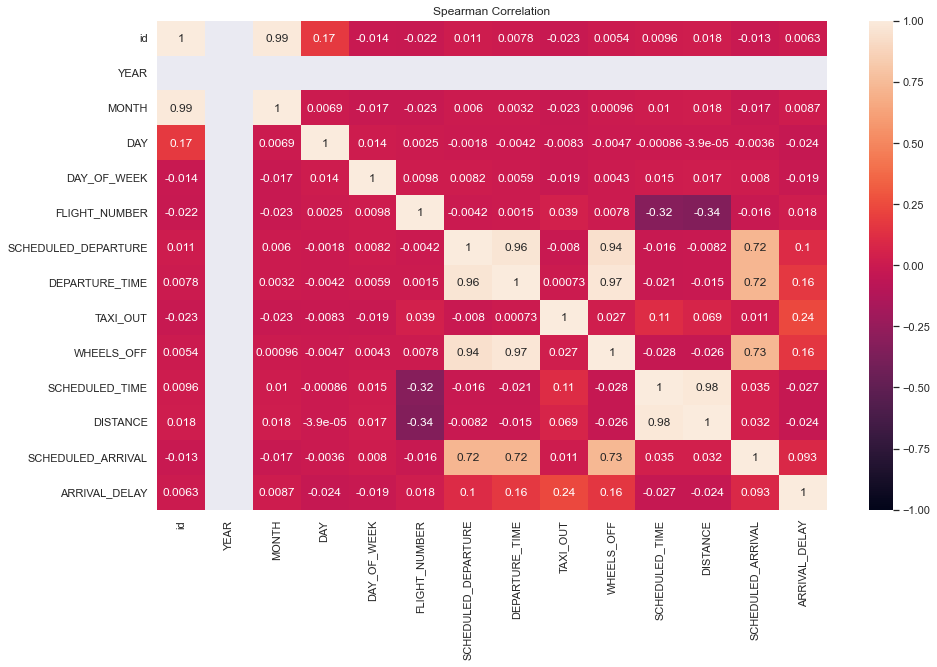

In [ ]:
def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(15, 9))
    heatmap = sns.heatmap(df.corr(), vmin=-1,
                          vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple = display_correlation(flights_train)
